# Communities and Crime

## WADE El Hadji Malick

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement et Nettoyage des données

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/donnees_challenge"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print ("Lignes: " ,Ytrainchallenge.shape[0])
print ("Colonnes: " ,Ytrainchallenge.shape[1])

print("---------------")
print ("\nVariables:")
print(Ytrainchallenge.dtypes)

Lignes:  1000
Colonnes:  1
---------------

Variables:
x    int64
dtype: object


In [4]:
Xtestchallenge.std().sort_values() < 5

V91      True
V424     True
V277     True
V405     True
V333     True
V229     True
V169     True
V174     True
V284     True
V206     True
V403     True
V155     True
V199     True
V281     True
V8       True
V167     True
V446     True
V40      True
V358     True
V388     True
V474     True
V228     True
V121     True
V393     True
V395     True
V238     True
V248     True
V41      True
V253     True
V97      True
V147     True
V208     True
V289     True
V401     True
V303     True
V492     True
V190     True
V168     True
V134     True
V430     True
V391     True
V408     True
V472     True
V39      True
V87     False
V54     False
V365    False
V149    False
V381    False
V326    False
V69     False
V421    False
V240    False
V457    False
V262    False
V497    False
V400    False
V89     False
V455    False
V164    False
V294    False
V197    False
V475    False
V62     False
V1      False
V64     False
V103    False
V6      False
V139    False
V75     False
V23     False
V410  

In [5]:
sum(Xtestchallenge.std().sort_values() < 10)

102

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


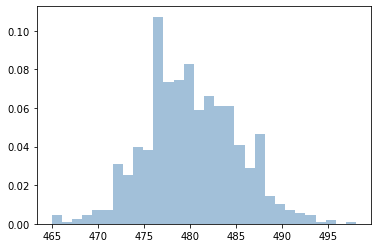

In [6]:
plt.hist(Xtrainchallenge.V54, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [7]:
Col_train = Xtrainchallenge.std() >30
Col_train = [i for i in Col_train.index if Col_train[i]==True]
Xtrainchallenge = Xtrainchallenge[Col_train]

In [8]:
Xtestchallenge = Xtestchallenge[Col_train]

In [9]:
# # On regarde la matrice de corrélation
# fig = plt.figure(1, figsize=(50, 50))

# sns.heatmap(round(Xtrainchallenge.corr(),2), cmap=sns.diverging_palette(20, 220, n=200), fmt=".2f")
# plt.show()

In [10]:
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])

print("---------------")
print ("\nVariables:")
print(Ytrainchallenge.dtypes)

Lignes:  1000
Colonnes:  181
---------------

Variables:
x    int64
dtype: object


## 2. Modèles de prédiction

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = 0.3, random_state = 40)

In [12]:
X_train = Xtrainchallenge
X_test = Xtestchallenge
y_train = Ytrainchallenge

In [13]:
# n_components = 150

# # TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
# pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

# #TODO: pass the training dataset (X_train) to pca's 'fit()' method
# pca = pca.fit(X_train)

In [14]:
# print("proportion de variance associée aux 10 premiéres axes:\n",pca.explained_variance_ratio_[:10])

In [15]:
# print("proportion total de variance associées aux axes: ",round(sum(pca.explained_variance_ratio_),4))

In [16]:
# #Apply dimensionality reduction to X.
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

#### a. LogisticRegression

In [17]:
# #on crée un nouveau modèle logit

# Logit = LogisticRegression(class_weight='balanced')

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_Logit = {
#                     "penalty": ['l2'],
#                     "C": [0.01,1,10,20,50,100,500,1000],
#                     "max_iter": [100, 200],
#                     "solver": ['newton-cg', 'sag', 'saga', 'lbfgs'],
#                    }

# #on utilise gridsearch pour tester toutes les valeurs de param_grid
# Logit_gscv = GridSearchCV(Logit, param_grid_Logit, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# Logit_gscv.fit(X_train, y_train)
# t_fin = time.time()

# temps_Logit = (t_fin - t_debut)/60

# print("Précision Train: ",round(Logit_gscv.score(X_train,y_train),3))
# print("\n")

# print(Logit_gscv.best_params_)

In [18]:
# y_pred_Logit = Logit_gscv.predict(X_test)

In [19]:
# np.savetxt('WADE_premier_test.txt', np.transpose(y_pred_Logit))

In [20]:
# #on crée un nouveau modèle SVM à noyau Polynomiale
# svmLINEAR = SVC(kernel='linear',class_weight='balanced',probability=True)

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_LINEAR = {"C": [0.01,1,10,20,50,100,500,1000,10000]}

# #on utilise gridsearch pour tester toutes les valeurs
# svmLINEAR_gscv = GridSearchCV(svmLINEAR, param_grid_LINEAR, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# svmLINEAR_gscv.fit(X_train, y_train)
# t_fin = time.time()

# temps_SVM_Linear = (t_fin - t_debut)/60

# print("Précision Train: ",round(svmLINEAR_gscv.score(X_train, y_train),3))
# print("Précision Test: ",round(svmLINEAR_gscv.score(X_test, y_test),3))
# print("\n")
# print(svmLINEAR_gscv.best_params_)

In [21]:
# print(confusion_matrix(y_test, y_pred_LINEAR)

In [22]:
# #on crée un nouveau modèle SVM à noyau Polynomiale
# svmPOLY = SVC(kernel='poly',class_weight='balanced', probability=True)

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_POLY = {
#                    "C": [0.01,1,10,20,50,100,500,1000],
#                    "gamma" : np.arange(0,1.1,0.1),
#                    "degree": [2,3,4,6],
#                    "coef0": np.arange(0,1,0.5)
#                    }

# #on utilise gridsearch pour tester toutes les valeurs
# svmPOLY_gscv = GridSearchCV(svmPOLY, param_grid_POLY, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# svmPOLY_gscv.fit(X_train_pca, y_train)
# t_fin = time.time()

# temps_SVM_Poly = (t_fin - t_debut)/60

# print("Précision Train: ",round(svmPOLY_gscv.score(X_train_pca, y_train),3))
# print("Précision Test: ",round(svmPOLY_gscv.score(X_test_pca, y_test),3))
# print("\n")
# print(svmPOLY_gscv.best_params_)

In [23]:
# print("Précision Train: ",round(svmPOLY_gscv.score(X_train_pca, y_train),3))
# print("Précision Test: ",round(svmPOLY_gscv.score(X_test_pca, y_test),3))
# print("\n")
# print(svmPOLY_gscv.best_params_)

In [24]:
# y_pred_POLY = svmPOLY_gscv.predict(X_test_pca)

In [25]:
# np.savetxt('myfile.txt', np.transpose([x,y,z]))

In [26]:
#on crée un nouveau modèle SVM à noyau Gaussien
svmRBF = SVC(kernel='rbf',class_weight='balanced',probability=True)

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_RBF = {
                  "C": [0.01,1,10,20,50,100,500,1000,10000],
                  "gamma" : np.arange(0,1,0.05)
                 }

#on utilise gridsearch pour tester toutes les valeurs de param_grid
svmRBF_gscv = GridSearchCV(svmRBF, param_grid_RBF, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
svmRBF_gscv.fit(X_train,y_train)
t_fin = time.time()

temps_SVM_Rbf = (t_fin - t_debut)/60

print("Précision Train: ",round(svmRBF_gscv.score(X_train,y_train),3))
print("Précision Test: ",round(svmRBF_gscv.score(X_test, y_test),3))

print("\n")

print(svmRBF_gscv.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 171 tasks      | elapsed:   

Précision Train:  0.501


NameError: name 'y_test' is not defined

In [27]:
#print("Précision Test: ",round(svmRBF_gscv.score(X_test, y_test),3))
y_pred_RBF = svmRBF_gscv.predict(X_test)

In [29]:
print(y_pred_RBF)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
np.savetxt('WADE_premier_test.txt', np.transpose(y_pred_RBF))

In [ ]:
# #on crée un nouveau modèle gradient Boosting
# GB = GradientBoostingRegressor()

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_GB = {
#     "loss": ['ls', 'lad'],
#     "learning_rate": [0.005, 0.01, 0.05, 0.1],
#     "min_samples_leaf": [0.005, 0.02, 1],
#     "max_depth":[8, 10],
#     "max_features":["log2","sqrt", 100],
#     "criterion": ["friedman_mse","mae","mse"],
#     "subsample":[0.5, 0.75, 1.0],
#     "n_estimators":[200, 400, 600],
#     }

# #on utilise gridsearch pour tester toutes les valeurs de param_grid
# GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# GB_gscv.fit(X_train,y_train)
# t_fin = time.time()

# temps_GB = (t_fin - t_debut)/60

# print(GB_gscv.best_params_)

In [ ]:
# mse_error = mean_squared_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# mean_abs_error = mean_absolute_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# median_error = median_absolute_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# max_error = max_error(y_test, GB_gscv.best_estimator_.predict(X_test))

# print("L’erreur quadratique moyenne: %.4f" % mse_error)
# print("L’erreur absolue moyenne: %.4f" % mean_abs_error)
# print("L’erreur maximun: %.4f" % max_error)
# print("Médiane de l'erreur absolue: %.4f" % median_error)
# print("--------")
# print("Moyenne: %.4f" %  y_test.mean())
# print("Mediane: %.4f" %  y_test.median())
# print("--------")

# #la valeur R au carré pour le train/essai.
# print("R-squared for Train: %.2f" %GB_gscv.score(X_train, y_train))
# print("R-squared for Test: %.2f" %GB_gscv.score(X_test, y_test))

In [ ]:
# model = GB_gscv.best_estimator_
# #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.figtext(.5,.9,"Importance des variables", fontsize=12, ha='center')
# plt.show()

#### b. Autres modéles avec réduction de dimensions/ PLS